In [2]:
import os
import numpy as np 
import pandas as pd 
import warnings
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

C:\Users\lenovo\AppData\Local\Temp\ipykernel_29528\2488349272.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
all_daily_features = ["weather_code", "temperature_2m_max", "temperature_2m_min", "temperature_2m_mean",
                      "sunshine_duration", "precipitation_sum", "precipitation_hours", "wind_speed_10m_max",
                      "wind_gusts_10m_max", "wind_direction_10m_dominant"]

daily_discrete_features = ["weather_code", "wind_direction_10m_dominant"]

all_hourly_features = ["temperature_2m", "relative_humidity_2m", "precipitation", "weather_code", "surface_pressure",
                       "cloud_cover", "wind_speed_10m", "wind_direction_10m", "wind_gusts_10m"]

hourly_discrete_features = ["weather_code", "wind_direction_10m"]


In [4]:
def prepare_data(df: pd.DataFrame, discrete_features: list[str]) -> pd.DataFrame:
    """Interpolates missing continuous values and drops rows with missing discrete values.

    :param df: (pd.DataFrame) Dataframe with features.
    :param discrete_features: (list[str]) List of discrete features.
    :return: (pd.DataFrame) Dataframe with interpolated continuous values and dropped rows with missing discrete values.
    """
    df = df.rename(columns={"date": "ds"})
    df = df.dropna(subset=discrete_features)
    df = df.interpolate(method="linear", limit_direction="both")
    return df

In [5]:
daily_weather = pd.read_csv("daily_weather_history_kyiv_2000-01-26-to-2020-01-26.csv",
                parse_dates=["date"], usecols=all_daily_features + ["date"]) 

daily_weather = prepare_data(daily_weather, daily_discrete_features)

daily_weather.head()

ds  weather_code  temperature_2m_max  temperature_2m_min  \
0 2000-01-26          71.0          -10.506001             -13.156   
1 2000-01-27          71.0            0.494000             -10.556   
2 2000-01-28          71.0            1.344000              -0.006   
3 2000-01-29           3.0            0.444000              -2.506   
4 2000-01-30          71.0            1.744000              -2.306   

   temperature_2m_mean  sunshine_duration  precipitation_sum  \
0           -11.553918          9083.6340                0.2   
1            -2.191416             0.0000                0.6   
2             0.639833             0.0000                0.1   
3            -0.920583         20505.8980                0.0   
4             0.133583          2038.1252                2.6   

   precipitation_hours  wind_speed_10m_max  wind_gusts_10m_max  \
0                  1.0           16.179985           30.960001   
1                  6.0           21.530890           38.519997   
2                  1.0           25.223133           41.760002   
3                  0.0           23.863409           41.760002   
4                 10.0           25.567604           44.280000   

   wind_direction_10m_dominant  
0                    281.16790  
1                    269.60640  
2                    259.74203  
3                    220.79974  
4                    218.39987

In [6]:
hourly_weather = pd.read_csv("hourly_weather_history_kyiv_2000-01-26-to-2020-01-26.csv",
                parse_dates=["date"], usecols=all_hourly_features + ["date"])

hourly_weather = prepare_data(hourly_weather, hourly_discrete_features)

hourly_weather.head()

ds  temperature_2m  relative_humidity_2m  precipitation  \
0 2000-01-26 00:00:00      -12.006001              82.65211            0.2   
1 2000-01-26 01:00:00      -11.556000              83.73142            0.0   
2 2000-01-26 02:00:00      -11.156000              84.46571            0.0   
3 2000-01-26 03:00:00      -10.806000              85.53970            0.0   
4 2000-01-26 04:00:00      -10.506001              86.26622            0.0   

   weather_code  surface_pressure  cloud_cover  wind_speed_10m  \
0          71.0         994.17505        100.0       16.179985   
1          71.0         993.62146        100.0       15.042659   
2          71.0         993.06400        100.0       13.320000   
3          71.0         992.99286        100.0       11.720751   
4          71.0         992.91766        100.0        9.366919   

   wind_direction_10m  wind_gusts_10m  
0           249.14546       30.960001  
1           248.96242       29.160000  
2           251.07526       27.000000  
3           259.38040       24.840000  
4           272.20255       21.599998

In [7]:
daily_weather.describe().T

count                 mean                  min  \
ds                             7306  2010-01-25 12:00:00  2000-01-26 00:00:00   
weather_code                 7306.0            32.012866                  0.0   
temperature_2m_max           7306.0            12.394484              -22.206   
temperature_2m_min           7306.0                5.225              -30.756   
temperature_2m_mean          7306.0             8.921002           -26.074747   
sunshine_duration            7306.0         26750.327169                  0.0   
precipitation_sum            7306.0             1.611922                  0.0   
precipitation_hours          7306.0             3.215987                  0.0   
wind_speed_10m_max           7306.0            17.226803             4.896529   
wind_gusts_10m_max           7306.0            34.899649                10.08   
wind_direction_10m_dominant  7306.0           196.813003             0.071066   

                                             25%                  50%  \
ds                           2005-01-25 06:00:00  2010-01-25 12:00:00   
weather_code                                 3.0                 51.0   
temperature_2m_max                         3.122               12.894   
temperature_2m_min                        -1.306                5.544   
temperature_2m_mean                     0.932021             9.358584   
sunshine_duration                      8399.5415           29156.1015   
precipitation_sum                            0.0                  0.0   
precipitation_hours                          0.0                  0.0   
wind_speed_10m_max                     12.924952            16.563911   
wind_gusts_10m_max                          27.0            33.839996   
wind_direction_10m_dominant           114.251473            204.96156   

                                             75%                  max  \
ds                           2015-01-25 18:00:00  2020-01-26 00:00:00   
weather_code                                55.0                 75.0   
temperature_2m_max                        21.644               36.394   
temperature_2m_min                        13.172               24.394   
temperature_2m_mean                    17.541396            30.100248   
sunshine_duration                      43364.157            54310.984   
precipitation_sum                            1.5                 51.7   
precipitation_hours                          5.0                 24.0   
wind_speed_10m_max                     20.746122            46.001183   
wind_gusts_10m_max                     41.399998                85.32   
wind_direction_10m_dominant           285.386525            359.99997   

                                      std  
ds                                    NaN  
weather_code                    29.477779  
temperature_2m_max              10.905481  
temperature_2m_min               9.229645  
temperature_2m_mean              9.975078  
sunshine_duration            18301.392213  
precipitation_sum                3.604482  
precipitation_hours              4.868443  
wind_speed_10m_max               5.798536  
wind_gusts_10m_max              11.101074  
wind_direction_10m_dominant    102.469525

In [8]:
hourly_weather.describe().T

count                 mean                  min  \
ds                      175344  2010-01-25 23:30:00  2000-01-26 00:00:00   
temperature_2m        175344.0             8.921002              -30.756   
relative_humidity_2m  175344.0            75.077924            17.341772   
precipitation         175344.0             0.067163                  0.0   
weather_code          175344.0             9.883492                  0.0   
surface_pressure      175344.0           997.483521            958.85315   
cloud_cover           175344.0            54.425758                  0.0   
wind_speed_10m        175344.0            12.407801                  0.0   
wind_direction_10m    175344.0           196.426509             0.636578   
wind_gusts_10m        175344.0             24.84149                 1.44   

                                      25%                  50%  \
ds                    2005-01-25 11:45:00  2010-01-25 23:30:00   
temperature_2m                      0.844                9.094   
relative_humidity_2m            63.771412            78.608986   
precipitation                         0.0                  0.0   
weather_code                          0.0                  2.0   
surface_pressure                 992.3611             997.2427   
cloud_cover                          17.4            54.600002   
wind_speed_10m                    8.12197            11.631956   
wind_direction_10m              114.44395            201.80147   
wind_gusts_10m                  16.199999                 23.4   

                                      75%                  max         std  
ds                    2015-01-26 11:15:00  2020-01-26 23:00:00         NaN  
temperature_2m                     17.244               36.394   10.316331  
relative_humidity_2m              88.5322                100.0    16.43351  
precipitation                         0.0                  9.4    0.285724  
weather_code                          3.0                 75.0   20.667037  
surface_pressure               1002.51434            1028.7252    8.213618  
cloud_cover                          97.2                100.0   38.108624  
wind_speed_10m                  15.893093            46.001183    5.664864  
wind_direction_10m               286.6993                360.0  102.570378  
wind_gusts_10m                      31.68                85.32   11.042719

In [9]:
px.imshow(daily_weather.corr(), title="Correlation Plot of daily_weather")

In [10]:
px.imshow(hourly_weather.corr(), title="Correlation Plot of hourly_weather")

[]

<Figure size 640x480 with 0 Axes>

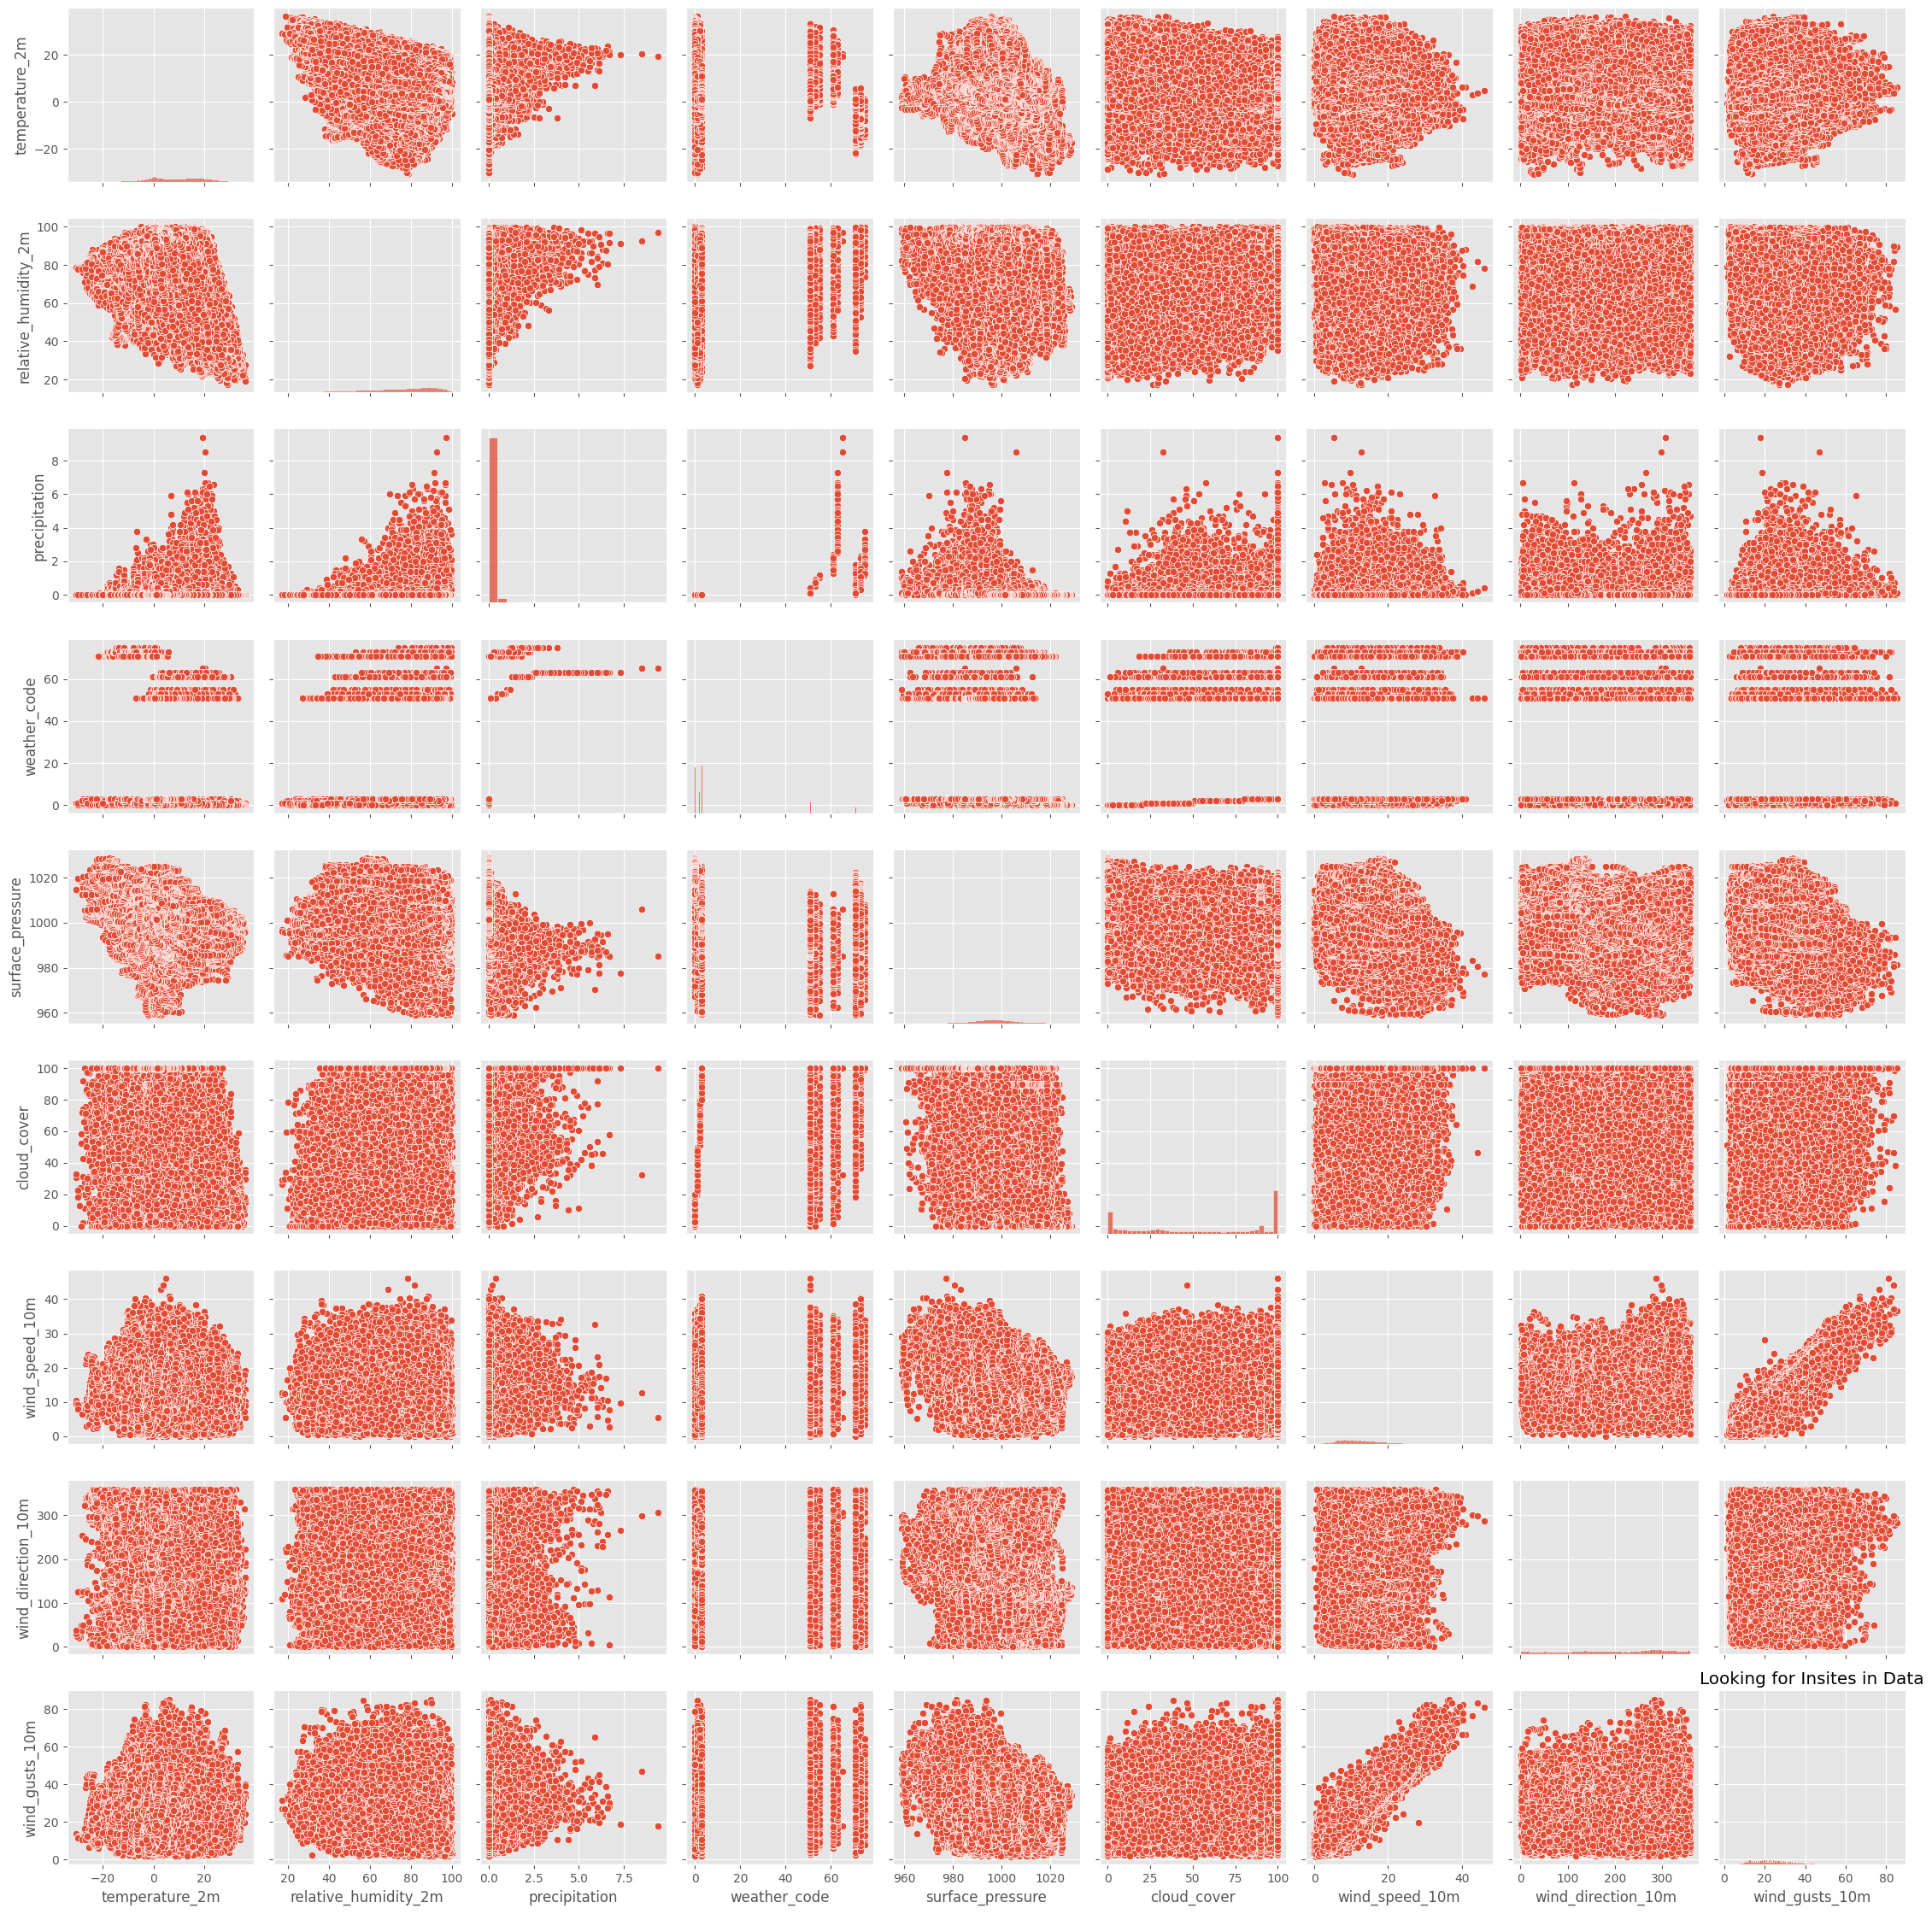

In [11]:
plt.figure()
sns.pairplot(hourly_weather)
plt.title("Looking for Insites in Data")
plt.tight_layout()
plt.plot()

[]

<Figure size 640x480 with 0 Axes>

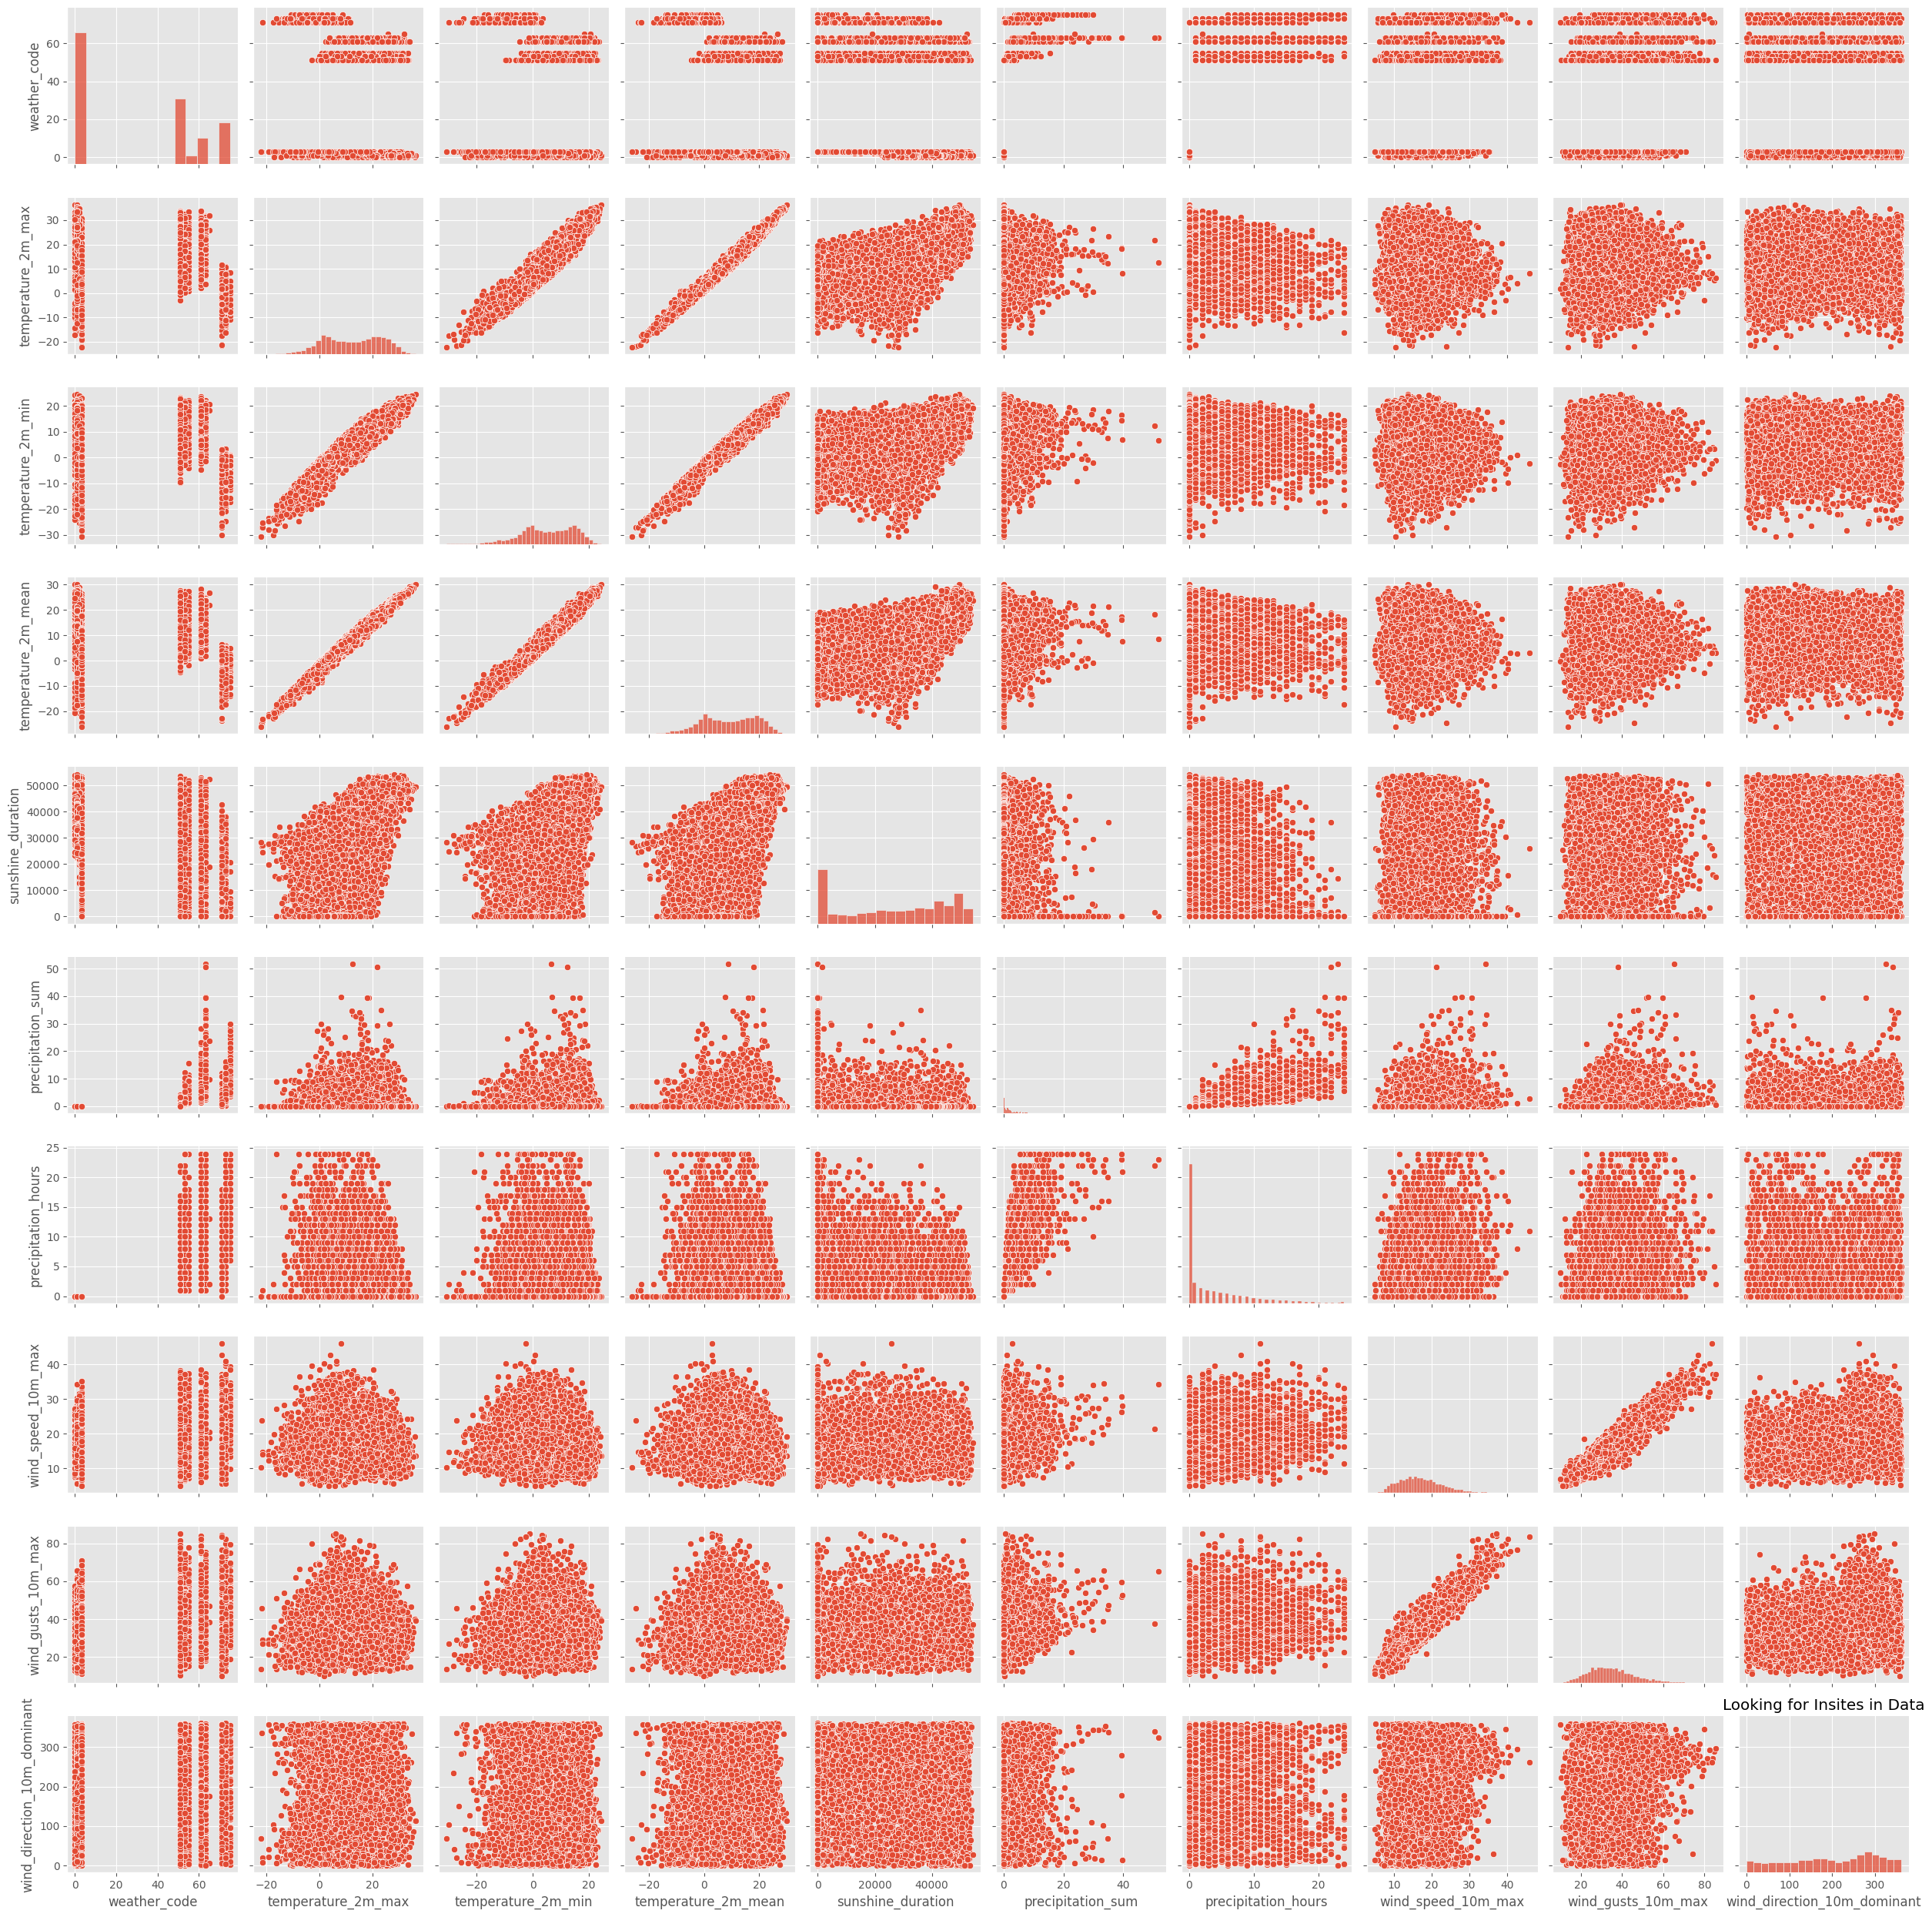

In [12]:
plt.figure()
sns.pairplot(daily_weather)
plt.title("Looking for Insites in Data")
plt.tight_layout()
plt.plot()

In [13]:
correlation_matrix = daily_weather.corr()
correlation_matrix


ds  weather_code  temperature_2m_max  \
ds                           1.000000     -0.018891            0.045281   
weather_code                -0.018891      1.000000           -0.145253   
temperature_2m_max           0.045281     -0.145253            1.000000   
temperature_2m_min           0.029652     -0.069639            0.957739   
temperature_2m_mean          0.036272     -0.115488            0.991870   
sunshine_duration           -0.001341     -0.319508            0.724376   
precipitation_sum           -0.018148      0.466048            0.034610   
precipitation_hours          0.015233      0.672176           -0.107924   
wind_speed_10m_max           0.028851      0.284128           -0.162475   
wind_gusts_10m_max           0.005403      0.283902           -0.007549   
wind_direction_10m_dominant -0.010517      0.127946           -0.054058   

                             temperature_2m_min  temperature_2m_mean  \
ds                                     0.029652             0.036272   
weather_code                          -0.069639            -0.115488   
temperature_2m_max                     0.957739             0.991870   
temperature_2m_min                     1.000000             0.983731   
temperature_2m_mean                    0.983731             1.000000   
sunshine_duration                      0.585944             0.672951   
precipitation_sum                      0.103346             0.060657   
precipitation_hours                   -0.017654            -0.072400   
wind_speed_10m_max                    -0.121689            -0.148969   
wind_gusts_10m_max                     0.026778             0.003820   
wind_direction_10m_dominant           -0.029818            -0.044806   

                             sunshine_duration  precipitation_sum  \
ds                                   -0.001341          -0.018148   
weather_code                         -0.319508           0.466048   
temperature_2m_max                    0.724376           0.034610   
temperature_2m_min                    0.585944           0.103346   
temperature_2m_mean                   0.672951           0.060657   
sunshine_duration                     1.000000          -0.227036   
precipitation_sum                    -0.227036           1.000000   
precipitation_hours                  -0.376129           0.780886   
wind_speed_10m_max                   -0.204710           0.237987   
wind_gusts_10m_max                   -0.063220           0.247478   
wind_direction_10m_dominant          -0.042283           0.010161   

                             precipitation_hours  wind_speed_10m_max  \
ds                                      0.015233            0.028851   
weather_code                            0.672176            0.284128   
temperature_2m_max                     -0.107924           -0.162475   
temperature_2m_min                     -0.017654           -0.121689   
temperature_2m_mean                    -0.072400           -0.148969   
sunshine_duration                      -0.376129           -0.204710   
precipitation_sum                       0.780886            0.237987   
precipitation_hours                     1.000000            0.294116   
wind_speed_10m_max                      0.294116            1.000000   
wind_gusts_10m_max                      0.281547            0.947585   
wind_direction_10m_dominant             0.046726            0.225679   

                             wind_gusts_10m_max  wind_direction_10m_dominant  
ds                                     0.005403                    -0.010517  
weather_code                           0.283902                     0.127946  
temperature_2m_max                    -0.007549                    -0.054058  
temperature_2m_min                     0.026778                    -0.029818  
temperature_2m_mean                    0.003820                    -0.044806  
sunshine_duration                     -0.063220                    -0.042283  
precipitation_sum     

In [14]:
correlation_matrix = hourly_weather.corr()
correlation_matrix

ds  temperature_2m  relative_humidity_2m  \
ds                    1.000000        0.035078             -0.034376   
temperature_2m        0.035078        1.000000             -0.512566   
relative_humidity_2m -0.034376       -0.512566              1.000000   
precipitation        -0.009537        0.034895              0.167396   
weather_code         -0.006110       -0.131698              0.266087   
surface_pressure      0.025213       -0.229920             -0.096061   
cloud_cover          -0.026923       -0.423809              0.436574   
wind_speed_10m        0.006509       -0.144440             -0.049851   
wind_direction_10m   -0.016906       -0.047967              0.076298   
wind_gusts_10m       -0.007167       -0.008016             -0.198446   

                      precipitation  weather_code  surface_pressure  \
ds                        -0.009537     -0.006110          0.025213   
temperature_2m             0.034895     -0.131698         -0.229920   
relative_humidity_2m       0.167396      0.266087         -0.096061   
precipitation              1.000000      0.566541         -0.213291   
weather_code               0.566541      1.000000         -0.280848   
surface_pressure          -0.213291     -0.280848          1.000000   
cloud_cover                0.198148      0.410004         -0.152985   
wind_speed_10m             0.116373      0.210828         -0.249107   
wind_direction_10m        -0.005660      0.017913         -0.151988   
wind_gusts_10m             0.149706      0.226147         -0.268107   

                      cloud_cover  wind_speed_10m  wind_direction_10m  \
ds                      -0.026923        0.006509           -0.016906   
temperature_2m          -0.423809       -0.144440           -0.047967   
relative_humidity_2m     0.436574       -0.049851            0.076298   
precipitation            0.198148        0.116373           -0.005660   
weather_code             0.410004        0.210828            0.017913   
surface_pressure        -0.152985       -0.249107           -0.151988   
cloud_cover              1.000000        0.235079            0.062897   
wind_speed_10m           0.235079        1.000000            0.158468   
wind_direction_10m       0.062897        0.158468            1.000000   
wind_gusts_10m           0.211649        0.934243            0.161463   

                      wind_gusts_10m  
ds                         -0.007167  
temperature_2m             -0.008016  
relative_humidity_2m       -0.198446  
precipitation               0.149706  
weather_code                0.226147  
surface_pressure           -0.268107  
cloud_cover                 0.211649  
wind_speed_10m              0.934243  
wind_direction_10m          0.161463  
wind_gusts_10m              1.000000